In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ~/bmi_dynamics_code/

/Users/preeyakhanna/bmi_dynamics_code


In [3]:
from online_analysis import util_fcns
import analysis_config

In [4]:
mag_boundaries = pickle.load(open(analysis_config.data_params['mag_bound_file']))

In [62]:
### This type of  code is used to plot the bar plots 

### Notes: full model is used to assess cyan / orange bars (not Loo_Ctrl)
### R2 are assessed on the same indices as "left out"
### Basically for a command to be considered for being left out, has to have enough density
### So, we need to assess full spks on same data that "left out" is assessed on; 
### Esp since we know inclusion of some bins is favorable for R2, comparing LO to full R2 
### wouldn't really be fair; 

### Leftout bins are from whats leftout in the condition,command PLUS removal of bin mag == 4 
### (both in transition FROM and transition TO)

# save_dict = {}
# for cat in ['com', 'mov']:
#     save_dict = generalization_plots.plot_loo_r2_overall(cat=cat, nshuffs = 2,
#             model_nm = 'hist_1pos_0psh_2spksm_1_spksp_0', 
#                                                          return_trans_from_lo=False, 
#                                                          plot_action=False,save_bars = True,
#                                                          save_dict = save_dict)
#     other_color = analysis_config.blue_rgb
# plot_act = False
# generalization_plots.bar_plot_loo_r2_overall(save_dict, 'combo_mov_com_'+str(plot_act), other_color=other_color,
#                                             fig4 = True, fig5 = False)

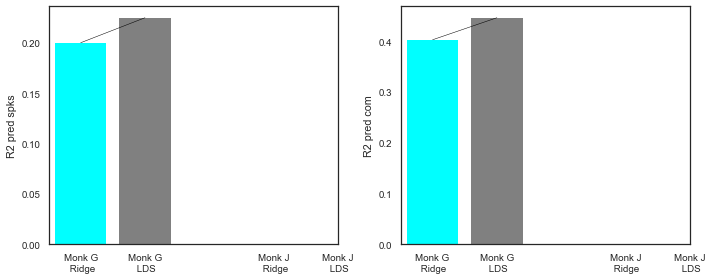

In [7]:
### For the purposes here, let's just remove the mag 4 
f, ax = plt.subplots(ncols = 2, figsize=(10, 4))

for ia, animal in enumerate(['grom']):#, 'jeev']): 
    
    fname = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set11_task_spec_pls_gen.pkl'%animal
    dat = pickle.load(open(fname))
    
    fname2 = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set6_.pkl'%animal
    dat_ridge = pickle.load(open(fname2))

    R2_pred_next_spks = []
    R2_pred_next_command = []
    
    for day_ix in range(1):#analysis_config.data_params['%s_ndays'%animal]): 

        spks      = dat_ridge[day_ix, 'spks']

        ### Figure 5 ###
        pred_spks = dat_ridge[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0'] ## no conditioning 
        pred_spks_latent = dat[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0_latentLDS'][:, :, 2] ### only did the condition-general one

        ### Quick comparison for now ### 
        neural_push = dat_ridge[day_ix, 'np']

        command_bins = util_fcns.commands2bins([neural_push], mag_boundaries, animal, day_ix, 
                                           vel_ix=[0, 1])[0]

        ### load the SLDS data ### 
        slds_dat = pickle.load(open(''))
        
        
        valid_analysis_ix = np.nonzero(command_bins[:, 0] < 4)[0]
                
        ### Get R2 for predicting next spkes ### 
        r2_spks = util_fcns.get_R2(spks[valid_analysis_ix, :], pred_spks[valid_analysis_ix, :])
        r2_latent = util_fcns.get_R2(spks[valid_analysis_ix, :], pred_spks_latent[valid_analysis_ix, :])
        R2_pred_next_spks.append([r2_spks, r2_latent])
        
        ### Get R2 for predicting next command ### 
        
        KG = util_fcns.get_decoder(animal, day_ix)
        r2_spks = util_fcns.get_R2(np.dot(spks[valid_analysis_ix, :], KG.T), np.dot(pred_spks[valid_analysis_ix, :],
                                                                                   KG.T))
        r2_latent = util_fcns.get_R2(np.dot(spks[valid_analysis_ix, :], KG.T), np.dot(pred_spks_latent[valid_analysis_ix, :],
                                                                                     KG.T))
        R2_pred_next_command.append([r2_spks, r2_latent])
        
        
    for ir2i, (R2, r2_lab) in enumerate(zip([R2_pred_next_spks, R2_pred_next_command],
                                 ['R2 pred spks', 'R2 pred com'])):   
        R2 = np.vstack((R2))
        ax[ir2i].bar(0+3*ia, np.mean(R2[:, 0]), color='cyan')
        ax[ir2i].bar(1+3*ia, np.mean(R2[:, 1]), color='gray')
        for i in range(R2.shape[0]): 
            ax[ir2i].plot(np.array([0, 1])+3*ia, R2[i, :], 'k-', linewidth=.5)
        ax[ir2i].set_ylabel(r2_lab)
        ax[ir2i].set_xticks([0, 1, 3, 4])
        ax[ir2i].set_xticklabels(['Monk G\n Ridge', 'Monk G\n LDS','Monk J\n Ridge', 'Monk J\n LDS'])
f.tight_layout()
#f.savefig('dynamics_sims/r2_ridge_vs_full_LDS.png')

In [75]:
KG = util_fcns.get_decoder(animal, day_ix)

In [76]:
KG.shape

(2, 21)

In [81]:
import sys
sys.version

'2.7.8 (default, Oct 15 2014, 22:04:42) \n[GCC 4.2.1 Compatible Apple LLVM 5.1 (clang-503.0.40)]'

In [82]:
pwd

u'/Users/preeyakhanna/bmi_dynamics_code'

In [84]:
cd ../Dropbox/TimeMachineBackups/grom2016/

/Users/preeyakhanna/Dropbox/TimeMachineBackups/grom2016


In [89]:
kw = {}
x = pickle.load(open('LDS_maxL_ndims.pkl', 'rb'), **kw)




In [88]:
x

{0: array([18]),
 1: array([18]),
 2: array([18]),
 3: array([18]),
 4: array([18]),
 5: array([18]),
 6: array([18]),
 7: array([18]),
 8: array([18]),
 (0, 'LLs'): array([[[ -99870.92502138,  -98649.66072799,  -98421.02034598,
           -98184.32579224,  -98005.11840301,  -97819.93154768,
           -97665.19940743,  -97576.14999567,  -97436.64462856],
         [-110460.68375652, -109221.29910663, -108947.31948445,
          -108649.50774238, -108417.56818889, -108284.93537852,
          -108168.89438168, -108092.49814525, -108059.30538117],
         [-108161.52003138, -106892.43955351, -106531.35806548,
          -106325.93093501, -106109.8342879 , -105977.51043937,
          -105855.23776912, -105809.18582508, -105693.60962923],
         [-108161.52003138, -106892.43955351, -106531.35806548,
          -106325.93093501, -106109.8342879 , -105977.51043937,
          -105855.23776912, -105809.18582508, -105693.60962923],
         [-108161.52003138, -106892.43955351, -106531.35806548,